In [54]:
import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm
import sys
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear2d
import post_processing
import PACKAGE_MP_3DLinear as Linear_3D
import PACKAGE_MP_3DVertex as Vertex_3D
sys.path.append(current_path+'/../calculate_tangent/')

import importlib
importlib.reload(post_processing)
importlib.reload(Linear_3D)
importlib.reload(linear2d)



<module 'PACKAGE_MP_Linear' from '/home/lin.yang/projects/VECTOR/examples/GB_velocity/../../PACKAGE_MP_Linear.py'>

# just calculate curvature


## 2D one GB

In [99]:
if __name__ == '__main__':
    # File name
    # data_file_folder = "/blue/michael.tonks/lin.yang/VECTOR_data/"
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/2d_poly_multiCoreCompare/results/"
    case_name = "2d_oneGB_GBE03"
    npy_file_name_aniso = f"p_iso_2_oneGB_GB_0.3_J1_seed56689_kt0.66.npy"
    
    # Initial data
    npy_file_aniso = np.load(npy_file_folder + npy_file_name_aniso) # microstructure
    npy_file_aniso = npy_file_aniso.astype(int)
    print(f"The {case_name} data size is: {npy_file_aniso.shape}")
    print("READING DATA DONE")
    step_num, size_x, size_y, size_z = npy_file_aniso.shape

The 2d_oneGB_GBE03 data size is: (321, 512, 512, 1)
READING DATA DONE


In [100]:
    # GB information
    grain_nums = 2
    curvature = np.zeros(step_num)
    curvature_matrix_list = []
    for time_step in tqdm(range(step_num)):
        current_microstructure = npy_file_aniso[time_step]
        cores = 128
        loop_times = 5
        R = np.zeros((size_x,size_y,3))
        smoothing_class = linear2d.linear_class(size_x,size_y,grain_nums,cores,loop_times,current_microstructure[:,:,0],R,verification_system = False,curvature_sign = True)
        smoothing_class.linear_main("curvature")
        C_ln = smoothing_class.get_C()
        curvature_matrix = C_ln[1,:]
        curvature_matrix_list.append(curvature_matrix)
    
        
        

100%|██████████| 321/321 [41:40<00:00,  7.79s/it]


In [107]:
    for time_step in tqdm(range(step_num)):
        num_site = 0
        for index, result in np.ndenumerate(current_microstructure):
            i,j,k = index
            if i < 150 or i > 400: continue
            ip,im,jp,jm = myInput.periodic_bc(size_x,size_y,i,j)
            if ( ((current_microstructure[ip,j,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[im,j,k]-current_microstructure[i,j,k])!=0) or\
                 ((current_microstructure[i,jp,k]-current_microstructure[i,j,k])!=0) or ((current_microstructure[i,jm,k]-current_microstructure[i,j,k])!=0) ) and\
               (current_microstructure[i,j,k]==1):
                curvature[time_step] += curvature_matrix_list[time_step][i,j]
                num_site += 1
        curvature[time_step] = curvature[time_step]/num_site

100%|██████████| 321/321 [02:09<00:00,  2.48it/s]


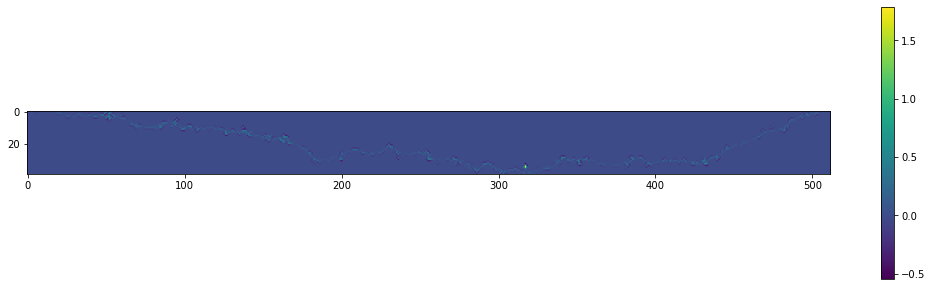

In [108]:
plt.figure(figsize=(18,5))
plt.imshow(curvature_matrix_list[160][240:280])
plt.colorbar()

The max curvature is 0.018256956254500713


<Figure size 432x288 with 0 Axes>

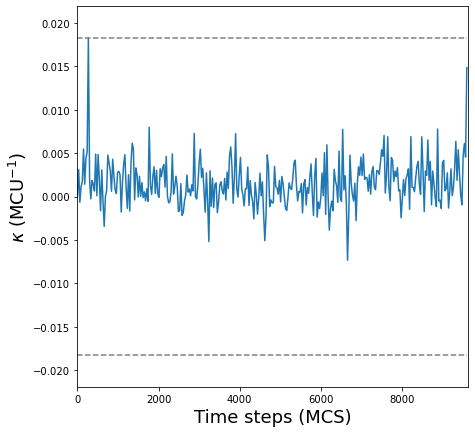

In [109]:
    plt.figure()
    plt.figure(figsize=(7,7))
    plt.plot(30*np.arange(len(curvature)), curvature)
    plt.plot(30*np.arange(len(curvature)),np.max(abs(curvature))*np.ones(len(curvature)), '--', color='grey')
    plt.plot(30*np.arange(len(curvature)),-np.max(abs(curvature))*np.ones(len(curvature)), '--', color='grey')
    plt.xlabel("Time steps (MCS)", fontsize=18)
    plt.ylabel(r"$\kappa$ (MCU$^{-1}$)", fontsize=18)
    plt.xlim([0,30*len(curvature)])
    plt.ylim([-np.max(abs(curvature))*1.2,np.max(abs(curvature))*1.2])
    figure_name_flatGB = f"figures/2D_iso_flatGB_maximum_curvature.png"
    plt.savefig(figure_name_flatGB, dpi=400,bbox_inches='tight')
    print(f"The max curvature is {np.max(abs(curvature))}")
    

In [110]:
np.sum(curvature_matrix_list[1][200:300])

20.028956791085122

## 3D one GB

In [46]:
if __name__ == '__main__':
    # File name
    # data_file_folder = "/blue/michael.tonks/lin.yang/VECTOR_data/"
    npy_file_folder = "/blue/michael.tonks/lin.yang/SPPARKS-VirtualIncEnergy/3d_poly_fully/results/"
    case_name = "3d_oneGB_GBE03"
    npy_file_name_aniso = f"p_iso_2_oneGB_GB_0.3_multiCore64_J1_refer_1_0_0_seed56689_kt1.95.npy"
    
    # Initial data
    npy_file_aniso = np.load(npy_file_folder + npy_file_name_aniso) # microstructure
    npy_file_aniso = npy_file_aniso.astype(int)
    print(f"The {case_name} data size is: {npy_file_aniso.shape}")
    print("READING DATA DONE")
    step_num, size_x, size_y, size_z = npy_file_aniso.shape

The 3d_oneGB_GBE10 data size is: (76, 150, 150, 150)
READING DATA DONE


In [47]:
    # GB information
    grain_nums = 2
    curvature_matrix_list = []
    for time_step in tqdm(range(step_num)):
        current_microstructure = npy_file_aniso[time_step]
        curvature_matrix = post_processing.IO_curvature(current_microstructure[:,30:120,:])
        curvature_matrix_list.append(curvature_matrix)
        
        

100%|██████████| 76/76 [1:12:09<00:00, 56.97s/it]


In [48]:
    curvature = np.zeros(step_num)
    for i in range(step_num):
        curvature[i] = curvature_matrix_list[i][2][3]

The max curvature is 0.005338626505416684


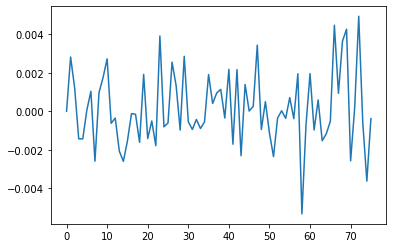

In [50]:
    plt.figure()
    plt.figure(figsize=(7,7))
    plt.plot(2*np.arange(len(curvature)), curvature)
    plt.plot(2*np.arange(len(curvature)),np.max(abs(curvature))*np.ones(len(curvature)), '--', color='grey')
    plt.plot(2*np.arange(len(curvature)),-np.max(abs(curvature))*np.ones(len(curvature)), '--', color='grey')
    plt.xlabel("Time steps (MCS)", fontsize=18)
    plt.ylabel(r"$\kappa$ (MCU$^{-1}$)", fontsize=18)
    plt.xlim([0,2*len(curvature)])
    plt.ylim([-np.max(abs(curvature))*1.2,np.max(abs(curvature))*1.2])
    figure_name_flatGB = f"figures/3D_iso_flatGB_maximum_curvature.png"
    plt.savefig(figure_name_flatGB, dpi=400,bbox_inches='tight')
    print(f"The max curvature is {np.max(abs(curvature))}")